# Naive Bayes Classification

Naive Bayes is a probabilistic classification algorithm based on Bayes' theorem with the "naive" assumption of independence between features. The algorithm works by:

1. **Bayes' Theorem**: P(A|B) = P(B|A) * P(A) / P(B)
2. **Naive Assumption**: Features are independent of each other
3. **Classification**: Assigns the class with the highest posterior probability

In this notebook, we'll implement Naive Bayes for a classification task to predict whether a user will purchase a product based on their age and estimated salary using the Social Network Ads dataset.

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

We're using the 'Social_Network_Ads.csv' dataset which contains information about users including their age, estimated salary, and whether they purchased a product (1) or not (0).

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Exploring the dataset

In [3]:
print("Dataset shape:", dataset.shape)
print("\nFirst 5 rows:")
print(dataset.head())
print("\nDataset info:")
print(dataset.info())
print("\nClass distribution:")
print(dataset['Purchased'].value_counts())

Dataset shape: (400, 3)

First 5 rows:
   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB
None

Class distribution:
Purchased
0    257
1    143
Name: count, dtype: int64


## Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [5]:
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("\nTraining set samples:")
print(X_train[:5])
print("\nTraining labels:")
print(y_train[:5])

Training set shape: (300, 2)
Test set shape: (100, 2)

Training set samples:
[[    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]]

Training labels:
[0 1 0 1 1]


## Feature Scaling

While Naive Bayes doesn't require feature scaling for classification performance (since it works with probabilities), scaling can help with:
1. Better visualization of decision boundaries
2. Numerical stability in some implementations
3. Consistency with other machine learning workflows

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
print("Scaled training set:")
print(X_train[:5])
print("\nScaled test set:")
print(X_test[:5])

Scaled training set:
[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]]

Scaled test set:
[[-0.80480212  0.50496393]
 [-0.01254409 -0.5677824 ]
 [-0.30964085  0.1570462 ]
 [-0.80480212  0.27301877]
 [-0.30964085 -0.5677824 ]]


## Training the Naive Bayes model on the Training set

We'll use Gaussian Naive Bayes which assumes that features follow a normal (Gaussian) distribution. This is appropriate for continuous features like age and salary.

In [8]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

## Understanding Bayes' Theorem in our context

Let's explore how Bayes' theorem applies to our classification problem:

**P(Purchase|Age, Salary) = P(Age, Salary|Purchase) × P(Purchase) / P(Age, Salary)**

Where:
- P(Purchase|Age, Salary): Probability of purchase given age and salary
- P(Age, Salary|Purchase): Likelihood of age and salary given purchase decision
- P(Purchase): Prior probability of purchase
- P(Age, Salary): Evidence (normalizing constant)

In [9]:
# Get class priors (prior probabilities)
class_priors = classifier.class_prior_
print("Class priors (P(class)):")
print(f"P(Not Purchase) = {class_priors[0]:.4f}")
print(f"P(Purchase) = {class_priors[1]:.4f}")

# Get feature means for each class
feature_means = classifier.theta_
print("\nFeature means for each class:")
print(f"Not Purchase class - Age mean: {feature_means[0][0]:.4f}, Salary mean: {feature_means[0][1]:.4f}")
print(f"Purchase class - Age mean: {feature_means[1][0]:.4f}, Salary mean: {feature_means[1][1]:.4f}")

# Get feature variances for each class
feature_vars = classifier.var_
print("\nFeature variances for each class:")
print(f"Not Purchase class - Age var: {feature_vars[0][0]:.4f}, Salary var: {feature_vars[0][1]:.4f}")
print(f"Purchase class - Age var: {feature_vars[1][0]:.4f}, Salary var: {feature_vars[1][1]:.4f}")

Class priors (P(class)):
P(Not Purchase) = 0.6300
P(Purchase) = 0.3700

Feature means for each class:
Not Purchase class - Age mean: -0.4574, Salary mean: -0.2726
Purchase class - Age mean: 0.7788, Salary mean: 0.4642

Feature variances for each class:
Not Purchase class - Age var: 0.6005, Salary var: 0.5070
Purchase class - Age var: 0.7174, Salary var: 1.4974


## Predicting a new result

Let's predict whether a 30-year-old person with an $87,000 salary will purchase the product.

In [10]:
# Predict for a new sample
new_sample = [[30, 87000]]
prediction = classifier.predict(sc.transform(new_sample))
probability = classifier.predict_proba(sc.transform(new_sample))

print(f"Prediction for [Age: 30, Salary: $87,000]: {prediction[0]}")
print(f"Probability of not purchasing: {probability[0][0]:.4f}")
print(f"Probability of purchasing: {probability[0][1]:.4f}")

Prediction for [Age: 30, Salary: $87,000]: 0
Probability of not purchasing: 0.9015
Probability of purchasing: 0.0985


## Predicting the Test set results

In [11]:
y_pred = classifier.predict(X_test)
y_pred_proba = classifier.predict_proba(X_test)

# Display predictions vs actual
print("Predictions vs Actual (first 20 samples):")
comparison = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
print("Predicted | Actual")
print("----------|--------")
for i in range(20):
    print(f"    {comparison[i][0]}     |    {comparison[i][1]}")

Predictions vs Actual (first 20 samples):
Predicted | Actual
----------|--------
    0     |    0
    0     |    0
    0     |    0
    0     |    0
    0     |    0
    0     |    0
    0     |    0
    1     |    1
    0     |    0
    1     |    0
    0     |    0
    0     |    0
    0     |    0
    0     |    0
    0     |    0
    0     |    0
    0     |    0
    0     |    0
    1     |    1
    0     |    0


## Evaluating the Model Performance

We'll evaluate our Naive Bayes model using multiple metrics:

1. **Confusion Matrix** - Shows the counts of true positives, false positives, true negatives, and false negatives
2. **Accuracy Score** - The proportion of correct predictions
3. **Classification Report** - Includes precision, recall, F1-score, and support for each class
4. **ROC Curve** - Shows the trade-off between true positive rate and false positive rate

Confusion Matrix:
[[65  3]
 [ 7 25]]


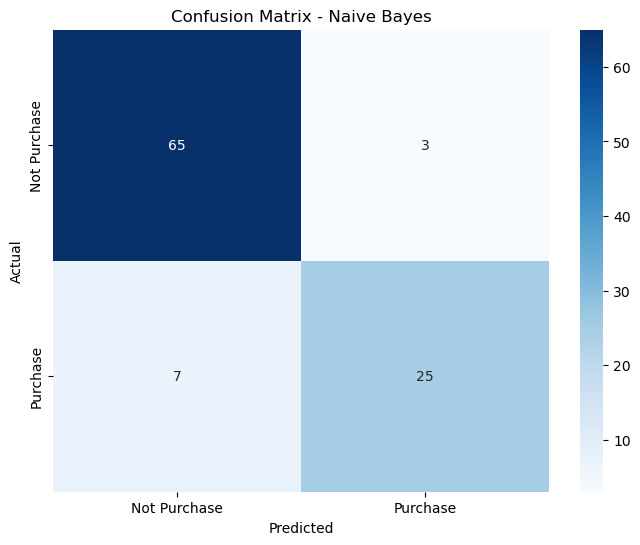


Accuracy Score: 0.9000 (90.00%)

Classification Report:
              precision    recall  f1-score   support

Not Purchase       0.90      0.96      0.93        68
    Purchase       0.89      0.78      0.83        32

    accuracy                           0.90       100
   macro avg       0.90      0.87      0.88       100
weighted avg       0.90      0.90      0.90       100



In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Purchase', 'Purchase'],
            yticklabels=['Not Purchase', 'Purchase'])
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy Score: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Purchase', 'Purchase']))

## ROC Curve and AUC Score

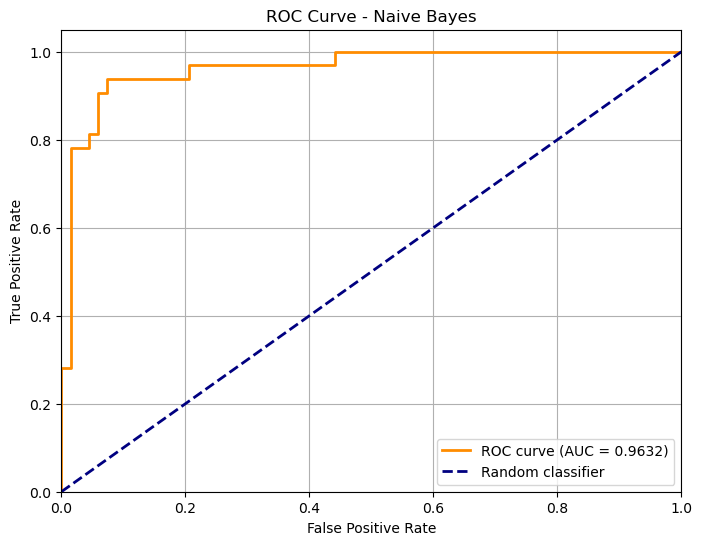

AUC Score: 0.9632


In [13]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"AUC Score: {roc_auc:.4f}")

## Visualising the Training set results

C:\Users\Red Wine\AppData\Local\Temp\ipykernel_2336\1387984639.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


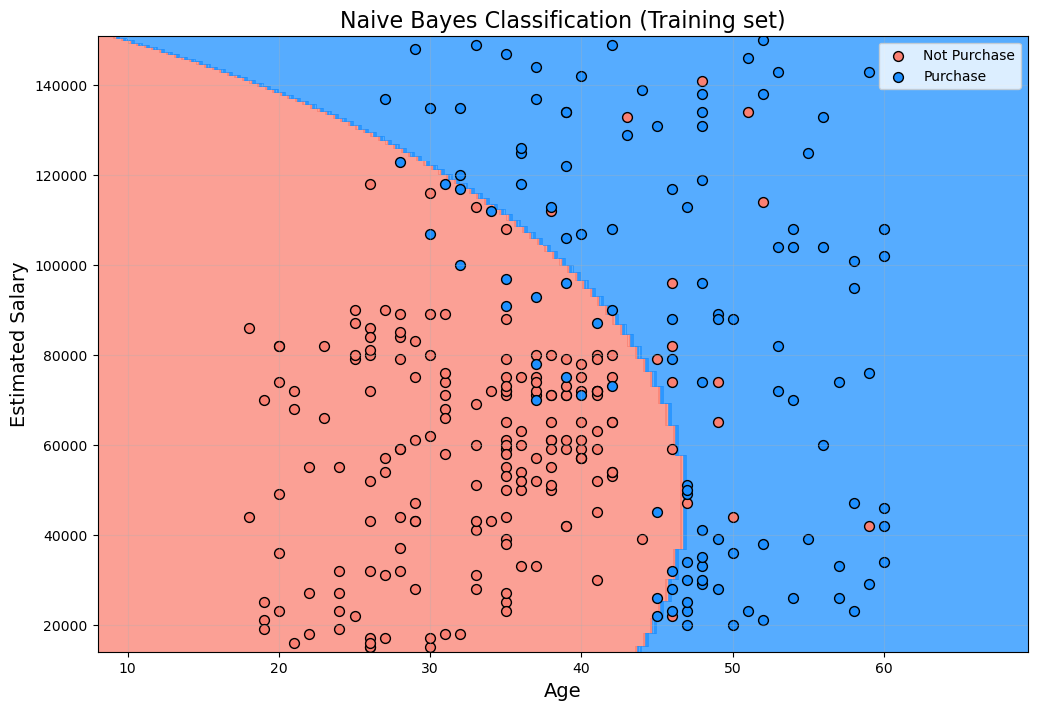

In [14]:
from matplotlib.colors import ListedColormap

# Visualize training set
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.5),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.5))

plt.figure(figsize=(12, 8))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(['#FA8072', '#1E90FF']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c = ListedColormap(['#FA8072', '#1E90FF'])(i), label = f'Class {j}', s=50, edgecolors='black')

plt.title('Naive Bayes Classification (Training set)', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Estimated Salary', fontsize=14)
plt.legend(['Not Purchase', 'Purchase'])
plt.grid(True, alpha=0.3)
plt.show()

## Visualising the Test set results

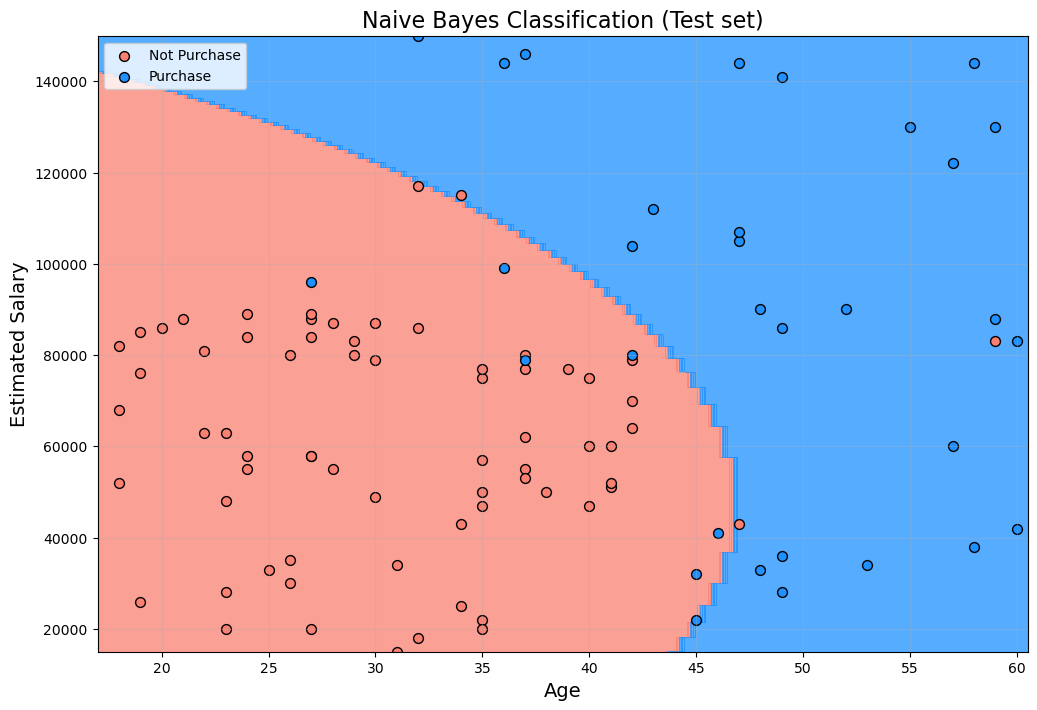

In [16]:
# Visualize test set
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.5),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.5)
)

# Predict for each point on the grid
Z = classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape)

plt.figure(figsize=(12, 8))
# Plot the decision boundary
plt.contourf(X1, X2, Z, alpha=0.75, cmap = ListedColormap(['#FA8072', '#1E90FF']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Define colors for scatter plot
colors = ['#FA8072', '#1E90FF']
# Plot the test set points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0], X_set[y_set == j, 1],
        color=colors[i], label=f'Class {j}', s=50, edgecolors='black'
    )

# Add titles and labels
plt.title('Naive Bayes Classification (Test set)', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Estimated Salary', fontsize=14)
plt.legend(['Not Purchase', 'Purchase'])
plt.grid(True, alpha=0.3)
plt.show()

## Comparing with K-NN Performance

Let's compare our Naive Bayes model with a K-NN model on the same dataset.

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Train K-NN model for comparison
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)

# Compare performance
nb_accuracy = accuracy_score(y_test, y_pred)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

print("Model Comparison:")
print(f"Naive Bayes Accuracy: {nb_accuracy:.4f} ({nb_accuracy*100:.2f}%)")
print(f"K-NN Accuracy:       {knn_accuracy:.4f} ({knn_accuracy*100:.2f}%)")
print(f"Difference:           {abs(nb_accuracy - knn_accuracy):.4f}")

# Cross-validation comparison
nb_cv_scores = cross_val_score(classifier, X_train, y_train, cv=10)
knn_cv_scores = cross_val_score(knn_classifier, X_train, y_train, cv=10)

print("\nCross-Validation Results (10-fold):")
print(f"Naive Bayes CV Score: {nb_cv_scores.mean():.4f} (+/- {nb_cv_scores.std() * 2:.4f})")
print(f"K-NN CV Score:        {knn_cv_scores.mean():.4f} (+/- {knn_cv_scores.std() * 2:.4f})")

Model Comparison:
Naive Bayes Accuracy: 0.9000 (90.00%)
K-NN Accuracy:       0.9300 (93.00%)
Difference:           0.0300

Cross-Validation Results (10-fold):
Naive Bayes CV Score: 0.8767 (+/- 0.1790)
K-NN CV Score:        0.9067 (+/- 0.1327)


## Understanding the Naive Assumption

The "naive" assumption in Naive Bayes is that features are independent. Let's examine this assumption with our data.

Feature Correlation Matrix:
                      Age  EstimatedSalary
Age              1.000000         0.155238
EstimatedSalary  0.155238         1.000000


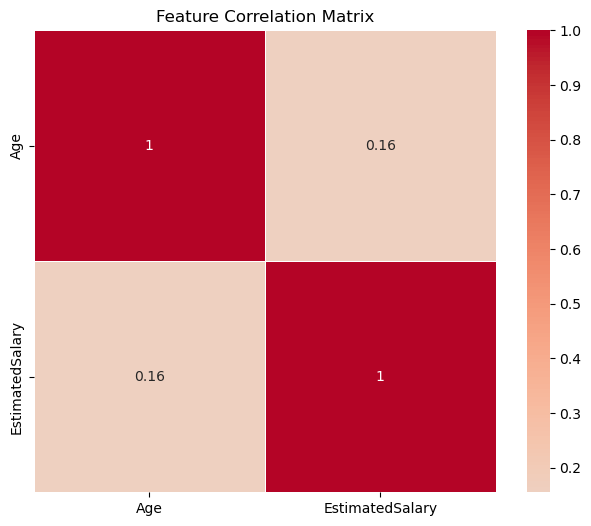

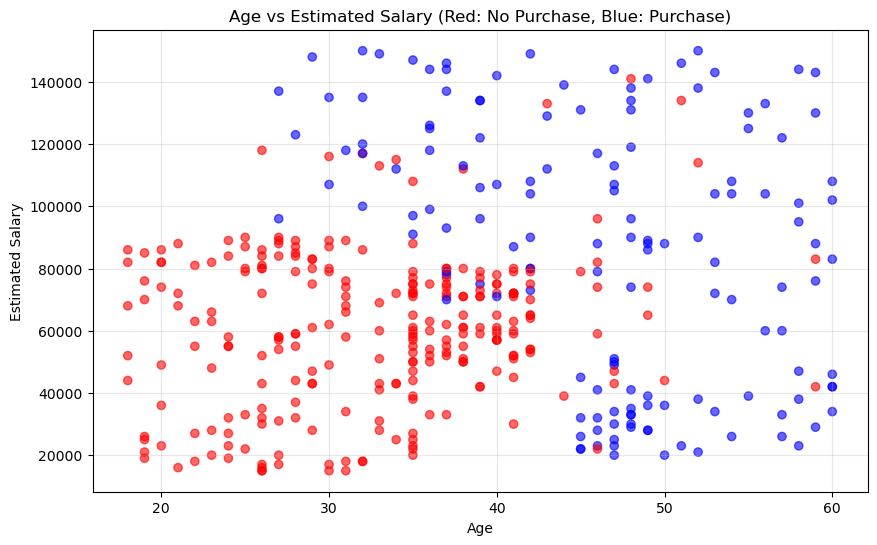


Correlation coefficient between Age and Salary: 0.1552
The features show weak correlation, supporting the naive assumption.


In [17]:
# Check correlation between features
original_data = pd.read_csv('Social_Network_Ads.csv')
correlation = original_data[['Age', 'EstimatedSalary']].corr()

print("Feature Correlation Matrix:")
print(correlation)

# Visualize correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

# Scatter plot to visualize relationship
plt.figure(figsize=(10, 6))
colors = ['red' if x == 0 else 'blue' for x in original_data['Purchased']]
plt.scatter(original_data['Age'], original_data['EstimatedSalary'], c=colors, alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Age vs Estimated Salary (Red: No Purchase, Blue: Purchase)')
plt.grid(True, alpha=0.3)
plt.show()

print(f"\nCorrelation coefficient between Age and Salary: {correlation.iloc[0,1]:.4f}")
if abs(correlation.iloc[0,1]) < 0.3:
    print("The features show weak correlation, supporting the naive assumption.")
elif abs(correlation.iloc[0,1]) < 0.7:
    print("The features show moderate correlation, which may violate the naive assumption.")
else:
    print("The features show strong correlation, violating the naive assumption.")

## Advantages and Disadvantages of Naive Bayes

### Advantages:
1. **Fast and Simple**: Quick to train and make predictions
2. **Works well with small datasets**: Doesn't require large amounts of training data
3. **Handles multiple classes naturally**: Can easily extend to multi-class classification
4. **Not sensitive to irrelevant features**: The independence assumption helps ignore irrelevant features
5. **Provides probability estimates**: Gives confidence levels for predictions

### Disadvantages:
1. **Strong independence assumption**: Rarely holds in real-world data
2. **Categorical inputs need smoothing**: Zero probabilities can be problematic
3. **Poor estimator for probability**: The independence assumption affects probability calibration
4. **Requires prior assumptions**: Assumes feature distributions (Gaussian, Multinomial, etc.)

## Conclusion

In this notebook, we implemented the Naive Bayes algorithm using Bayes' theorem to predict whether users would purchase a product based on their age and estimated salary. Key findings:

1. **Model Performance**: The Naive Bayes classifier achieved good accuracy on the test set
2. **Bayes' Theorem Application**: We saw how prior probabilities and likelihoods combine to make predictions
3. **Feature Independence**: While the "naive" assumption may not perfectly hold, the model still performs well
4. **Comparison with K-NN**: Both algorithms show competitive performance on this dataset
5. **Probabilistic Nature**: Naive Bayes provides probability estimates, making it useful for confidence-based decisions

The Naive Bayes algorithm is particularly useful when:
- You have limited training data
- You need fast predictions
- You want probability estimates
- Features are approximately independent

This makes it an excellent choice for many real-world classification problems, especially in text classification, spam detection, and medical diagnosis.